In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [2]:
GB_sum = pd.read_csv('/Users/Emily/Desktop/GB/GBUBFU.csv', index_col=0)
GB_sum.head()

,WellNo,area,Total Worms,Chemotaxis,Strain,File Name,Well width,Plate ID,Passes QC,Compound
0,1A,2338061,116,0.030303,GN1077,GN1077_001,3070,GB_GN1077_R1_P1,N,Ziyuglycoside II
1,1B,2338309,127,0.098039,GN1077,GN1077_001,3058,GB_GN1077_R1_P1,N,DMSO
2,1C,2324680,120,0.180952,GN1077,GN1077_001,3057,GB_GN1077_R1_P1,N,Pulchinenoside A
3,1D,2310248,67,0.132075,GN1077,GN1077_001,3056,GB_GN1077_R1_P1,N,Water
0,1A,2349547,216,0.291429,GN1077,GN1077_002,3053,GB_GN1077_R2_P1,Y,Ziyuglycoside II


In [3]:
N2_data = pd.read_csv('/Users/Emily/Desktop/GB/GB_S1.csv', index_col=0)
n2_sub = N2_data.loc[(N2_data['Compound']=='Pulchinenoside A') | (N2_data['Compound']=='Ziyuglycoside II')|(N2_data['Compound']=='DMSO')|(N2_data['Compound']=='Water')]
n2_sub = n2_sub.replace({'Compound':{'Pulchinenoside A':'Anemoside A3'}})

In [4]:
n2_sub

,WellNo,area,Total Worms,Chemotaxis,Strain,File Name,Well width,Plate ID,Passes QC,Compound
8,3A,2313683,235,0.452055,N2,GB_001,3075,GB_N2_R1_P3,Y,Anemoside A3
9,3B,2353555,198,0.218935,N2,GB_001,3068,GB_N2_R1_P3,Y,Ziyuglycoside II
10,3C,2355006,198,0.360947,N2,GB_001,3069,GB_N2_R1_P3,Y,DMSO
11,3D,2345489,168,0.026667,N2,GB_001,3051,GB_N2_R1_P3,Y,Water
0,1A,2306151,261,0.321739,N2,GB_002,3045,GB_N2_R2_P1,Y,DMSO
6,2C,2321785,244,0.308411,N2,GB_002,3073,GB_N2_R2_P2,Y,Ziyuglycoside II
7,2D,2308939,231,0.228571,N2,GB_002,3064,GB_N2_R2_P2,Y,Anemoside A3
8,3A,2291080,249,0.183099,N2,GB_002,3078,GB_N2_R2_P3,Y,Water
0,1A,2333445,238,0.114155,N2,GB_003,3058,GB_N2_R3_P1,Y,DMSO
2,1C,2274390,342,0.019355,N2,GB_003,3040,GB_N2_R3_P1,Y,Water


In [5]:
GB_sum = GB_sum.replace({'Compound':{'Pulchinenoside A':'Anemoside A3'}})

In [6]:
frames = [GB_sum, n2_sub]
all_dat = pd.concat(frames)
all_dat.tail()

,WellNo,area,Total Worms,Chemotaxis,Strain,File Name,Well width,Plate ID,Passes QC,Compound
8,3A,2291080,249,0.183099,N2,GB_002,3078,GB_N2_R2_P3,Y,Water
0,1A,2333445,238,0.114155,N2,GB_003,3058,GB_N2_R3_P1,Y,DMSO
2,1C,2274390,342,0.019355,N2,GB_003,3040,GB_N2_R3_P1,Y,Water
7,2D,2338244,190,0.293413,N2,GB_003,3067,GB_N2_R3_P2,Y,Ziyuglycoside II
10,3C,2346495,186,0.158537,N2,GB_003,3049,GB_N2_R3_P3,Y,Anemoside A3


In [7]:
def get_worm_locs_c(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    compound = row['Compound']
    xs = temp['X']
    if compound in result_dict:
        result_dict[compound] = result_dict[compound].append(xs)
        #print(compound + ' ' + str(len(result_dict[compound])))
        result_dict[compound].reset_index(inplace=True, drop=True)
        #print(result_dict.keys())
        
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[compound]=xs

    return result_dict

In [8]:
def get_worm_locs_s(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    strain = row['Strain']
    xs = temp['X']
    if strain in result_dict:
        result_dict[strain] = result_dict[strain].append(xs)
        #print(compound + ' ' + str(len(result_dict[compound])))
        result_dict[strain].reset_index(inplace=True, drop=True)
        #print(result_dict.keys())
        
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[strain]=xs

    return result_dict

In [9]:
fpath = plb.Path('C:/Users/Emily/Desktop/GB/')

In [10]:
strains =  all_dat['Strain'].unique().tolist()
strains.remove('empty')
strains

compounds = all_dat['Compound'].unique().tolist()
compounds.remove( 'Compound column not matched')


In [11]:
c_ord = [ 'Water', 'DMSO','Ziyuglycoside II',  'Anemoside A3']
s_dict = {'N2':'#515A5A', 'PR678':'#D4AC0D', 'CX10':'#2874A6', 'GN1077':'#1E8449' }
s_ord = ['N2', 'GN1077', 'PR678', 'CX10']
c_dict = {'DMSO':'#515A5A',
 'Water':'#515A5A','Chikusetsusaponin IV':'#515A5A', 'Anemoside A3':'#CD6155',
 'Ziyuglycoside II':'#CD6155'}

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fi

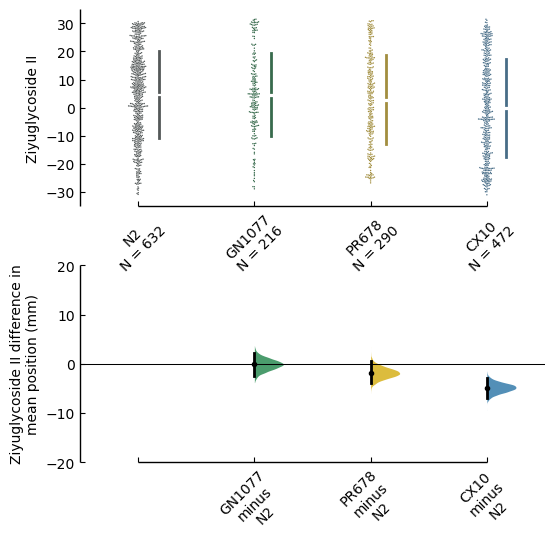

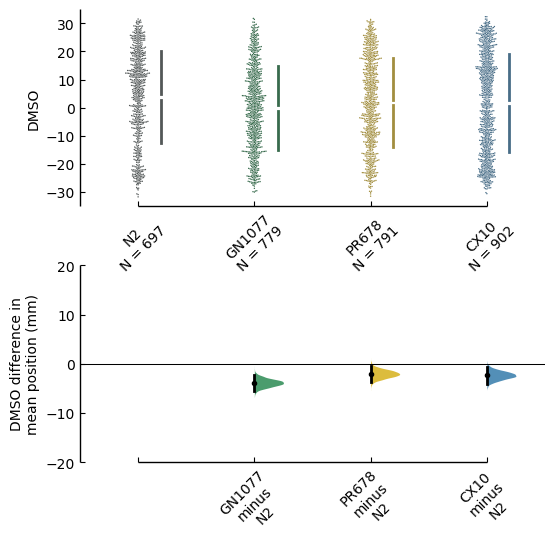

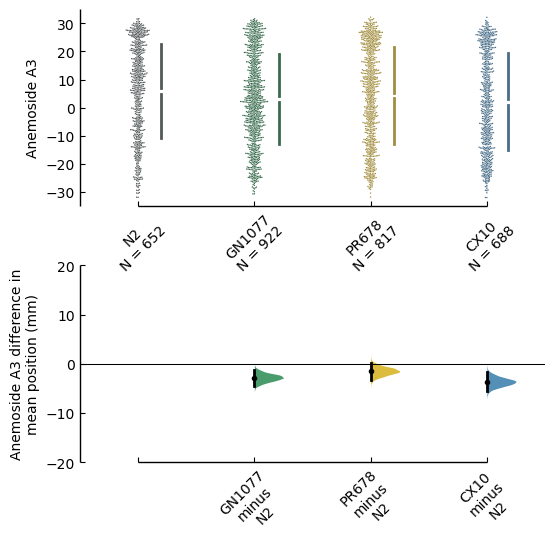

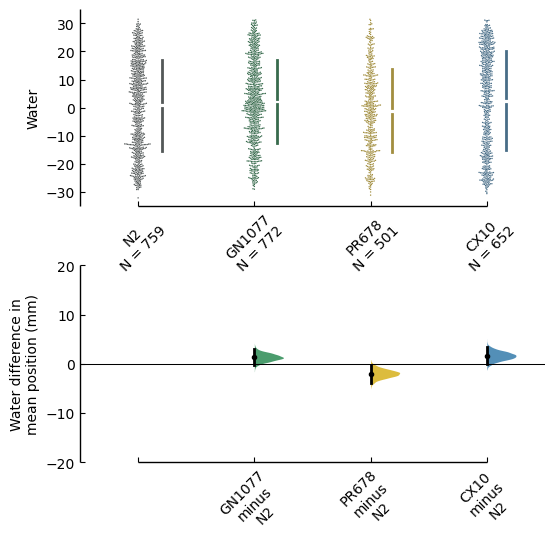

In [16]:
for c in compounds:
    h = {}
    for s in strains:
        data = all_dat.loc[(all_dat['Compound'] == c) & (all_dat['Strain'] == s)]
        for index, row in data.iterrows():
            if row['Passes QC'] == 'Y':
#                 if s_pnum != (s, row['Plate ID']):
#                     s_pnum = (s, row['Plate ID'])
                hold = get_worm_locs_s(row, fpath, h)
#                 else:
#                     continue
            elif row['Passes QC'] == 'N':
                continue
                
    pooled = pd.DataFrame.from_dict(hold)
    pooled.to_csv('C:/Users/Emily/Desktop/GB/' + c + '_xs.csv')
    mm = 25.4
    # 1200 pixels per 25.4mm
    px_mm = 1200/mm
    #The following transforms the worm location data so that it is respective to the start zone
    # The start zone is at the center of the image; Start Zone = 0mm
    #Worms with positive values are closer to the compound, negative values are away from the compound
    mm_df = pooled.apply(lambda x: -(x/px_mm)+32.5)
    db_obj = db.load(mm_df, idx=(s_ord))
    res = db_obj.mean_diff.results



    mm_plot = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = c, custom_palette=s_dict,
                                        contrast_label= c + " difference in\nmean position (mm)",contrast_ylim = (-20,20), swarm_ylim=(-35,35), es_marker_size=3)

    #Accessing plot axes to control plot asthetics
    rawswarm_axes = mm_plot.axes[0]
    contrast_axes = mm_plot.axes[1]

    rawswarm_axes.yaxis.set_tick_params(tickdir='in')
    rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
    contrast_axes.yaxis.set_tick_params(tickdir='in')
    contrast_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
    plt.rcParams['svg.fonttype'] = 'none'    
    #res.to_csv('C:/Users/Emily/Desktop/DS/btwn_strains_' + c + '.csv')
    plt.savefig('C:/Users/Emily/Desktop/GB/Figs/' + c + '_N2ref.svg')

In [17]:
p = all_dat.loc[all_dat['Compound']=='Anemoside A3']

In [14]:
p

,WellNo,area,Total Worms,Chemotaxis,Strain,File Name,Well width,Plate ID,Passes QC,Compound
2,1C,2324680,120,0.180952,GN1077,GN1077_001,3057,GB_GN1077_R1_P1,N,Anemoside A3
2,1C,2295212,265,0.371429,GN1077,GN1077_002,3061,GB_GN1077_R2_P1,Y,Anemoside A3
2,1C,2252980,396,0.065476,GN1077,GN1077_003,3055,GB_GN1077_R3_P1,Y,Anemoside A3
2,1C,2259286,261,0.004525,GN1077,GN1077_004,3053,GB_GN1077_R4_P1,Y,Anemoside A3
2,1C,2308411,245,0.057143,CX10,osmNR01_Scan001,3047,GB_OSMN_R1_P1,Y,Anemoside A3
2,1C,2245485,251,-0.089286,CX10,osmNR02_Scan002,2965,GB_OSMN_R2_P1,Y,Anemoside A3
2,1C,2223038,192,0.202312,CX10,osmNR03_Scan003,3029,GB_OSMN_R3_P1,Y,Anemoside A3
2,1C,2296589,287,0.239216,PR678,taxNR01_Scan001,3035,GB_TAXN_R1_P1,Y,Anemoside A3
2,1C,2318197,155,0.179856,PR678,taxNR02_Scan002,3045,GB_TAXN_R2_P1,Y,Anemoside A3
2,1C,2249835,375,0.201201,PR678,taxNR03.Scan003,3070,GB_TAXN_R3,Y,Anemoside A3
